# Dataset Analysis for On Time Performance
## Nadia Ferrer | EM212 - Applied Data Science | Project 2

This dataset was collected by the Bureau of Transportation Statistics (BTS) to specifically track the on-time performance, describing the arrival date for non-stop domestic flights by major air carriers for the year of 2008, which captured the merging and acquiring of certain airlines and carriers. 

#### One task that this database will be analyzed for is in determining whether on-time performance varies by airline or time of the quarter, month, week.
_____________________________________________________________________________________________________________________

In [17]:
df = pd.read_csv("OnTimePerf.csv")
df.head()

/Users/NadiaFerrer/miniconda3/envs/em212/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,year,quarter,month,dayofmonth,dayofweek,flightdate,uniquecarrier,airlineid,carrier,tailnum,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,filler,serialid
0,2008,4,10,17,5,2008-10-17T00:00:00,AA,19805,AA,N634AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1063502
1,2008,4,10,7,2,2008-10-07T00:00:00,AA,19805,AA,N4XLAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1062508
2,2008,4,10,3,5,2008-10-03T00:00:00,AA,19805,AA,N527AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1061355
3,2008,4,10,21,2,2008-10-21T00:00:00,AA,19805,AA,N5DWAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1059967
4,2008,4,10,13,1,2008-10-13T00:00:00,AA,19805,AA,N4YGAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1062513


# First, I created a subset of my data with select columns so I could pay attention to a select variables

May need to come back and add other important columns in data as I learn more

In [32]:
subset_cols = ["month","dayofmonth", "dayofweek","carrier","arrdelayminutes", "carrierdelay","weatherdelay","nasdelay","securitydelay","lateaircraftdelay","serialid"]
df_subset = df[subset_cols]
df_subset.head()

,month,dayofmonth,dayofweek,carrier,arrdelayminutes,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,serialid
0,10,17,5,AA,3.0,NaN,NaN,NaN,NaN,NaN,1063502
1,10,7,2,AA,0.0,NaN,NaN,NaN,NaN,NaN,1062508
2,10,3,5,AA,0.0,NaN,NaN,NaN,NaN,NaN,1061355
3,10,21,2,AA,0.0,NaN,NaN,NaN,NaN,NaN,1059967
4,10,13,1,AA,0.0,NaN,NaN,NaN,NaN,NaN,1062513


Note: NaN for delays means that there was a delay time of zero

## If I need to select a section of the data, this is the code I can use
Will come back to later if needed

In [5]:
rows = list(range(10))
rows
df_subset.iloc[rows]

,month,dayofmonth,dayofweek,carrier,arrdelayminutes,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,10,17,5,AA,3.0,NaN,NaN,NaN,NaN,NaN
1,10,7,2,AA,0.0,NaN,NaN,NaN,NaN,NaN
2,10,3,5,AA,0.0,NaN,NaN,NaN,NaN,NaN
3,10,21,2,AA,0.0,NaN,NaN,NaN,NaN,NaN
4,10,13,1,AA,0.0,NaN,NaN,NaN,NaN,NaN
5,10,26,7,AA,340.0,334.0,0.0,6.0,0.0,0.0
6,10,15,3,AA,0.0,NaN,NaN,NaN,NaN,NaN
7,10,27,1,AA,0.0,NaN,NaN,NaN,NaN,NaN
8,10,30,4,AA,1.0,NaN,NaN,NaN,NaN,NaN
9,10,18,6,AA,0.0,NaN,NaN,NaN,NaN,NaN


## Distribution of Flights Among Carriers

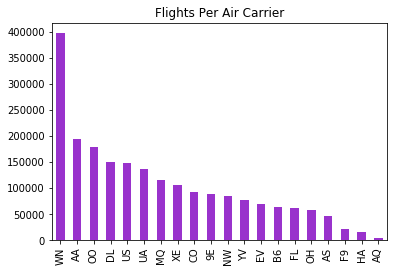

In [7]:
plt.title('Flights Per Air Carrier')
plt.grid(axis='y', alpha=0.75)
df['carrier'].value_counts().plot(kind='bar',color='#9932CC')

## Histogram for Arrival Delay in Minutes

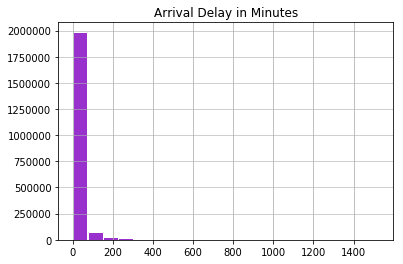

In [8]:
df.arrdelayminutes.hist(grid=True, bins=20, rwidth=0.9,color='#9932CC')
plt.title('Arrival Delay in Minutes')
plt.grid(axis='y', alpha=0.75)

## Statistics for Arrival Delay in Minutes

In [9]:
df.arrdelayminutes.describe()

count    2.072969e+06
mean     1.312227e+01
std      3.418928e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+01
max      1.525000e+03
Name: arrdelayminutes, dtype: float64

## Analyzing Delays by Carrier (using groupby)

In [34]:
delays_by_carrier = df_subset.groupby(['carrier', 'arrdelayminutes']).size()
delays_by_carrier

carrier  arrdelayminutes
9E       0.0                51615
         1.0                 1822
         2.0                 1716
         3.0                 1511
         4.0                 1457
         5.0                 1432
         6.0                 1243
         7.0                 1193
         8.0                 1166
         9.0                  982
         10.0                 949
         11.0                 875
         12.0                 833
         13.0                 764
         14.0                 688
         15.0                 689
         16.0                 629
         17.0                 555
         18.0                 564
         19.0                 565
         20.0                 496
         21.0                 476
         22.0                 474
         23.0                 441
         24.0                 413
         25.0                 368
         26.0                 368
         27.0                 330
         28.0          

In [26]:
df_subset.carrierdelay.describe()

count    435446.000000
mean         15.293462
std          38.487458
min           0.000000
25%           0.000000
50%           0.000000
75%          16.000000
max        1369.000000
Name: carrierdelay, dtype: float64

# Identifying Types of Delays (Causes)

I want to make a histogram for each type of delay cause, but I don't know exactly how to do that yet

In [18]:
df_delays = df_subset.iloc[:, 3:10]
df_delays.head()

,carrier,arrdelayminutes,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,AA,3.0,NaN,NaN,NaN,NaN,NaN
1,AA,0.0,NaN,NaN,NaN,NaN,NaN
2,AA,0.0,NaN,NaN,NaN,NaN,NaN
3,AA,0.0,NaN,NaN,NaN,NaN,NaN
4,AA,0.0,NaN,NaN,NaN,NaN,NaN


## Carrier Delay

In [21]:
carrier_delay = df_delays.groupby(['carrier', 'carrierdelay']).size()
carrier_delay.head()

carrier  carrierdelay
9E       0.0             11415
         6.0                90
         7.0               111
         8.0               122
         9.0                90
dtype: int64

In [24]:
carrier_delay.describe()

count     5582.000000
mean        78.008957
std        881.784067
min          1.000000
25%          1.000000
50%          4.000000
75%         20.750000
max      31126.000000
dtype: float64

## Weather Delay

In [29]:
weather_delay = df_delays.groupby(['carrier', 'arrdelayminutes']).size()
weather_delay.head()

carrier  arrdelayminutes
9E       0.0                51615
         1.0                 1822
         2.0                 1716
         3.0                 1511
         4.0                 1457
dtype: int64

In [30]:
weather_delay.describe()

count      7307.000000
mean        283.696319
std        4144.914605
min           1.000000
25%           2.000000
50%           8.000000
75%          52.000000
max      243860.000000
dtype: float64

## Security Delay

In [44]:
security_delay = df_delays.groupby(['carrier', 'securitydelay']).size()
security_delay.head()

carrier  securitydelay
9E       0.0              17480
         6.0                  1
         7.0                  1
         8.0                  2
         11.0                 1
dtype: int64

In [54]:
security_delay.describe()

count      519.000000
mean       839.009634
std       5230.444963
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max      71373.000000
dtype: float64

# Merging Datasets
The following dataset is from the same source as the original dataset and collects the same type of data. However, this dataset is more recent, solely for the month of January 2019. I would like to use merge and compare this data to see whether there has been an increase or decrease in the delay times in minuttes for carriers and/or days of the week.

In [ ]:
df2 = np.loadtxt("OnTimeJan2019.asc", skiprows=6)
df.head()

In [ ]:
df.merge(df2, left key = "arrdelayminutes", right key ="df2_arrdelayminutes")